In [61]:
!git clone https://github.com/roboflow-ai/pytorch-YOLOv4.git

fatal: destination path 'pytorch-YOLOv4' already exists and is not an empty directory.


In [62]:
%cd /content/pytorch-YOLOv4
!pip install -r requirements.txt

/content/pytorch-YOLOv4


In [63]:
# download yolov4 weights that have already been converted to Python
!gdown https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA

Downloading...
From: https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA
To: /content/pytorch-YOLOv4/yolov4.conv.137.pth
170MB [00:00, 218MB/s]


In [ ]:
# REPLACE this link with your Roboflow dataset (export as YOLOv4 PyTorch format)
!curl -L /content/drive/My Drive/weapons.v1.yolov4pytorch #> roboflow.zip; unzip roboflow.zip; rm roboflow.zip

curl: (3) <url> malformed
curl: (6) Could not resolve host: Drive


In [64]:
!curl -L "https://app.roboflow.ai/ds/caxn9BnKZg?key=IbG8OdSQ69" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0    885      0  0:00:01  0:00:01 --:--:--   885
100 28.0M  100 28.0M    0     0  17.6M      0  0:00:01  0:00:01 --:--:-- 75.6M
Archive:  roboflow.zip
replace test/d4c6942e8dc961c5_jpg.rf.02285b24d15d9484abfb1027b5ad4515.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: т
error:  invalid response [т]
replace test/d4c6942e8dc961c5_jpg.rf.02285b24d15d9484abfb1027b5ad4515.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace test/041a1ce4ca6668de_jpg.rf.4097aa24958e719083652d2b1cd7d1fb.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: test/041a1ce4ca6668de_jpg.rf.4097aa24958e719083652d2b1cd7d1fb.jpg  
replace test/d07c1f136750b15d_jpg.rf.079e3a74557d895ffd76c977e2336ec8.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: allo
error:  invalid response [allo]
replace test/d07c1f136750b15d_jpg.rf.079e3a74557d895ffd

In [65]:
%cp train/_annotations.txt train/train.txt
%cp train/_annotations.txt train.txt
%cp valid/_annotations.txt data/val.txt
%cp valid/*.jpg train/

In [66]:
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('train/_classes.txt')

In [67]:
print(num_classes)

1


In [68]:
#start training
#-b batch size (you should keep this low (2-4) for training to work properly)
#-s number of subdivisions in the batch, this was more relevant for the darknet framework
#-l learning rate
#-g direct training to the GPU device
#pretrained invoke the pretrained weights that we downloaded above
#classes - number of classes
#dir - where the training data is
#epoch - how long to train for
!python train.py -b 2 -s 1 -l 0.001 -g 0 -pretrained ./yolov4.conv.137.pth -classes {num_classes} -dir ./train -epochs 50

log file path:log/log_2020-06-27_23-25-41.txt
2020-06-27 23:25:41,713 train.py[line:435] INFO: Using device cuda
2020-06-27 23:25:45,305 train.py[line:282] INFO: Starting training:
        Epochs:          50
        Batch size:      2
        Subdivisions:    1
        Learning rate:   0.001
        Training size:   700
        Validation size: 200
        Checkpoints:     True
        Device:          cuda
        Images size:     608
        Optimizer:       adam
        Dataset classes: 1
        Train label path:train.txt
        Pretrained:
    
Epoch 1/50:   0%|        | 0/700 [00:00<?, ?img/s]/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Epoch 1/50:   5%| | 38/700 [00:08<01:37,  6.78img//usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler,

In [51]:
!ls checkpoints

Yolov4_epoch10.pth  Yolov4_epoch22.pth	Yolov4_epoch34.pth  Yolov4_epoch46.pth
Yolov4_epoch11.pth  Yolov4_epoch23.pth	Yolov4_epoch35.pth  Yolov4_epoch47.pth
Yolov4_epoch12.pth  Yolov4_epoch24.pth	Yolov4_epoch36.pth  Yolov4_epoch48.pth
Yolov4_epoch13.pth  Yolov4_epoch25.pth	Yolov4_epoch37.pth  Yolov4_epoch49.pth
Yolov4_epoch14.pth  Yolov4_epoch26.pth	Yolov4_epoch38.pth  Yolov4_epoch4.pth
Yolov4_epoch15.pth  Yolov4_epoch27.pth	Yolov4_epoch39.pth  Yolov4_epoch50.pth
Yolov4_epoch16.pth  Yolov4_epoch28.pth	Yolov4_epoch3.pth   Yolov4_epoch5.pth
Yolov4_epoch17.pth  Yolov4_epoch29.pth	Yolov4_epoch40.pth  Yolov4_epoch6.pth
Yolov4_epoch18.pth  Yolov4_epoch2.pth	Yolov4_epoch41.pth  Yolov4_epoch7.pth
Yolov4_epoch19.pth  Yolov4_epoch30.pth	Yolov4_epoch42.pth  Yolov4_epoch8.pth
Yolov4_epoch1.pth   Yolov4_epoch31.pth	Yolov4_epoch43.pth  Yolov4_epoch9.pth
Yolov4_epoch20.pth  Yolov4_epoch32.pth	Yolov4_epoch44.pth
Yolov4_epoch21.pth  Yolov4_epoch33.pth	Yolov4_epoch45.pth


In [72]:
#choose random test image
import os
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);

In [73]:
%%time
##change the epoch here to the one you would like to use for inference
!python models.py {num_classes} checkpoints/Yolov4_epoch46.pth {img_path} test/_classes.txt

/content/pytorch-YOLOv4/tool/utils.py:16: RuntimeWarning: overflow encountered in exp
  return 1.0 / (np.exp(-x) + 1.)
save plot results to predictions.jpg
CPU times: user 22.2 ms, sys: 5.69 ms, total: 27.9 ms
Wall time: 7.2 s


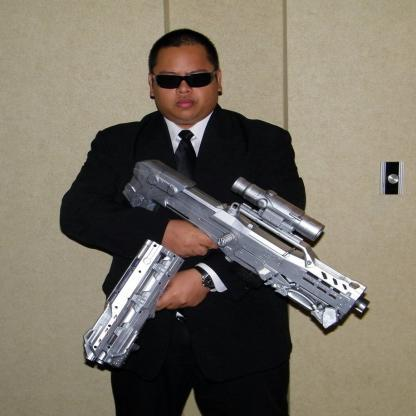

In [74]:
#visualize inference
from IPython.display import Image
Image('predictions.jpg')



















































































